In [ ]:
## Задание 1 

In [ ]:
# Считаю частоты для 5-грамм в корпусе через sent_tokenize (russian) -> word_tokenize -> ngrammer

In [33]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
from nltk import sent_tokenize

In [2]:
from nltk.tokenize import word_tokenize

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Пользователь\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [12]:
corpus = open('lenta.txt', encoding="utf8").read()

In [53]:
sent_tokenize(corpus, language='russian')

['Бои у Сопоцкина и Друскеник закончились отступлением германцев.',
 'Неприятель, приблизившись с севера к Осовцу начал артиллерийскую борьбу с крепостью.',
 'В артиллерийском бою принимают участие тяжелые калибры.',
 'С раннего утра 14 сентября огонь достиг значительного напряжения.',
 'Попытка германской пехоты пробиться ближе к крепости отражена.',
 'В Галиции мы заняли Дембицу.',
 'Большая колонна, отступавшая по шоссе от Перемышля к Саноку, обстреливалась с высот нашей батареей и бежала, бросив парки, обоз и автомобили.',
 'Вылазки гарнизона Перемышля остаются безуспешными.',
 'При продолжающемся отступлении австрийцев обнаруживается полное перемешивание их частей, захватываются новые партии пленных, орудия и прочая материальная часть.',
 'На перевале Ужок мы разбили неприятельский отряд, взяли его артиллерию и много пленных и, продолжая преследовать, вступили в пределы Венгрии.',
 '«Русский инвалид», 16 сентября 1914 года.Министерство народного просвещения, в виду происходящих чр

In [70]:
import re

In [71]:
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

In [82]:
tokenized_sentences = [[token.lower() for token in sentence if not re.match('\W+', token)] 
                       for sentence in tokenized_sentences]

In [83]:
tokenized_sentences

[['бои',
  'у',
  'сопоцкина',
  'и',
  'друскеник',
  'закончились',
  'отступлением',
  'германцев'],
 ['неприятель',
  'приблизившись',
  'с',
  'севера',
  'к',
  'осовцу',
  'начал',
  'артиллерийскую',
  'борьбу',
  'с',
  'крепостью'],
 ['в', 'артиллерийском', 'бою', 'принимают', 'участие', 'тяжелые', 'калибры'],
 ['с',
  'раннего',
  'утра',
  '14',
  'сентября',
  'огонь',
  'достиг',
  'значительного',
  'напряжения'],
 ['попытка',
  'германской',
  'пехоты',
  'пробиться',
  'ближе',
  'к',
  'крепости',
  'отражена'],
 ['в', 'галиции', 'мы', 'заняли', 'дембицу'],
 ['большая',
  'колонна',
  'отступавшая',
  'по',
  'шоссе',
  'от',
  'перемышля',
  'к',
  'саноку',
  'обстреливалась',
  'с',
  'высот',
  'нашей',
  'батареей',
  'и',
  'бежала',
  'бросив',
  'парки',
  'обоз',
  'и',
  'автомобили'],
 ['вылазки', 'гарнизона', 'перемышля', 'остаются', 'безуспешными'],
 ['при',
  'продолжающемся',
  'отступлении',
  'австрийцев',
  'обнаруживается',
  'полное',
  'перемешива

In [84]:
from collections import Counter

In [85]:
token_counts = Counter()
for sentence in tokenized_sentences:
    token_counts.update(sentence)

In [86]:
token_counts.most_common(10)

[('в', 69941),
 ('и', 32908),
 ('на', 28127),
 ('по', 19233),
 ('что', 17030),
 ('с', 15737),
 ('не', 12689),
 ('из', 7708),
 ('как', 7370),
 ('о', 7117)]

In [87]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Пользователь\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [88]:
from nltk.corpus import stopwords

In [89]:
russian_stopwords = set(stopwords.words('russian'))

In [90]:
token_counts = Counter()
for sentence in tokenized_sentences:
    token_counts.update([token for token in sentence if token not in russian_stopwords])

In [91]:
token_counts.most_common(10)

[('россии', 5442),
 ('сообщает', 4591),
 ('также', 4087),
 ('года', 3602),
 ('новости', 3586),
 ('риа', 3517),
 ('это', 3273),
 ('время', 3168),
 ('словам', 2993),
 ('заявил', 2940)]

In [108]:
pentagram_counts = Counter()
for sentence in tokenized_sentences:
 
    pentagram_counts.update(ngrammer([token for token in sentence], 5))

pentagram_counts.most_common(5)

[('риа новости со ссылкой на', 400),
 ('сообщает риа новости со ссылкой', 320),
 ('как сообщили риа новости в', 196),
 ('как сообщает риа новости со', 149),
 ('сообщает интерфакс со ссылкой на', 142)]

In [ ]:
# Попытка посчитать частоты для 5-грамм через word_tokene(preserve_line=True) - ngrammer

In [128]:
from nltk.tokenize import TreebankWordTokenizer
_treebank_word_tokenizer = TreebankWordTokenizer()

In [144]:
def word_tokenize(corpus, language='russian', preserve_line=True):
    
    sentences = [corpus] if preserve_line else sent_tokenize(corpus, language)
    return [token for sent in sentences
            for token in _treebank_word_tokenizer.tokenize(sent)]

In [145]:
TreebankWordTokenizer().tokenize(corpus)

['Бои',
 'у',
 'Сопоцкина',
 'и',
 'Друскеник',
 'закончились',
 'отступлением',
 'германцев.',
 'Неприятель',
 ',',
 'приблизившись',
 'с',
 'севера',
 'к',
 'Осовцу',
 'начал',
 'артиллерийскую',
 'борьбу',
 'с',
 'крепостью.',
 'В',
 'артиллерийском',
 'бою',
 'принимают',
 'участие',
 'тяжелые',
 'калибры.',
 'С',
 'раннего',
 'утра',
 '14',
 'сентября',
 'огонь',
 'достиг',
 'значительного',
 'напряжения.',
 'Попытка',
 'германской',
 'пехоты',
 'пробиться',
 'ближе',
 'к',
 'крепости',
 'отражена.',
 'В',
 'Галиции',
 'мы',
 'заняли',
 'Дембицу.',
 'Большая',
 'колонна',
 ',',
 'отступавшая',
 'по',
 'шоссе',
 'от',
 'Перемышля',
 'к',
 'Саноку',
 ',',
 'обстреливалась',
 'с',
 'высот',
 'нашей',
 'батареей',
 'и',
 'бежала',
 ',',
 'бросив',
 'парки',
 ',',
 'обоз',
 'и',
 'автомобили.',
 'Вылазки',
 'гарнизона',
 'Перемышля',
 'остаются',
 'безуспешными.',
 'При',
 'продолжающемся',
 'отступлении',
 'австрийцев',
 'обнаруживается',
 'полное',
 'перемешивание',
 'их',
 'частей',

In [ ]:
# Не смогла понять, как через word_tokene(preserve_line=True) посчитать частоту. У меня получилось только токенизировать

In [158]:
## Задание 2

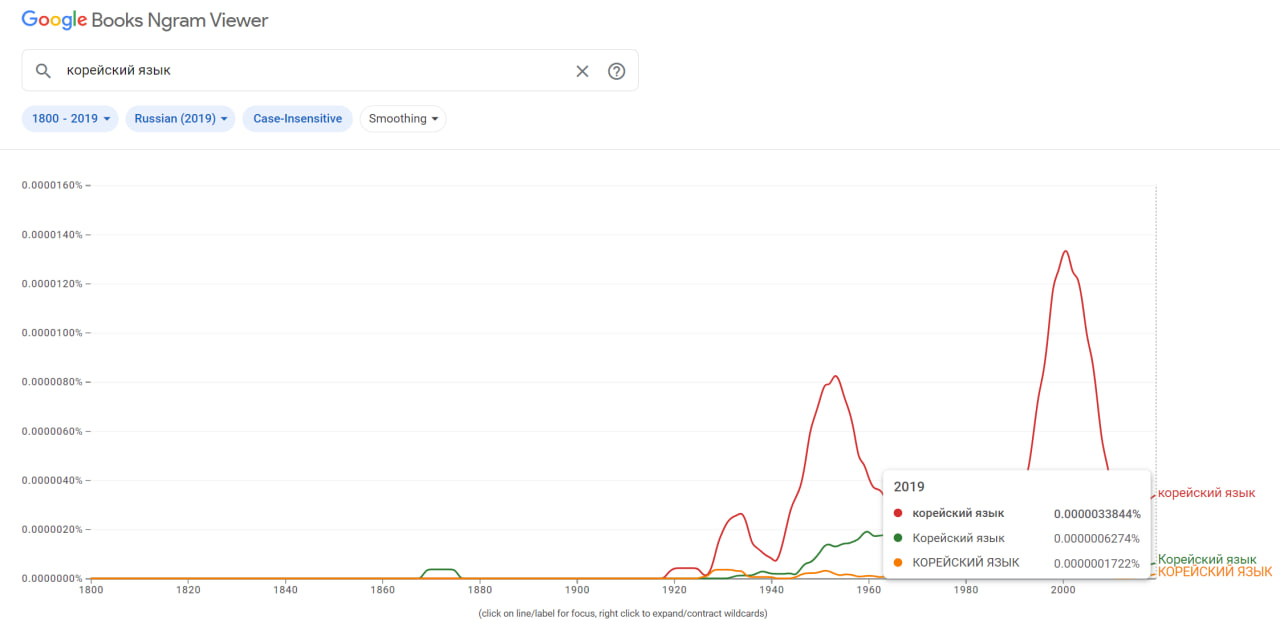 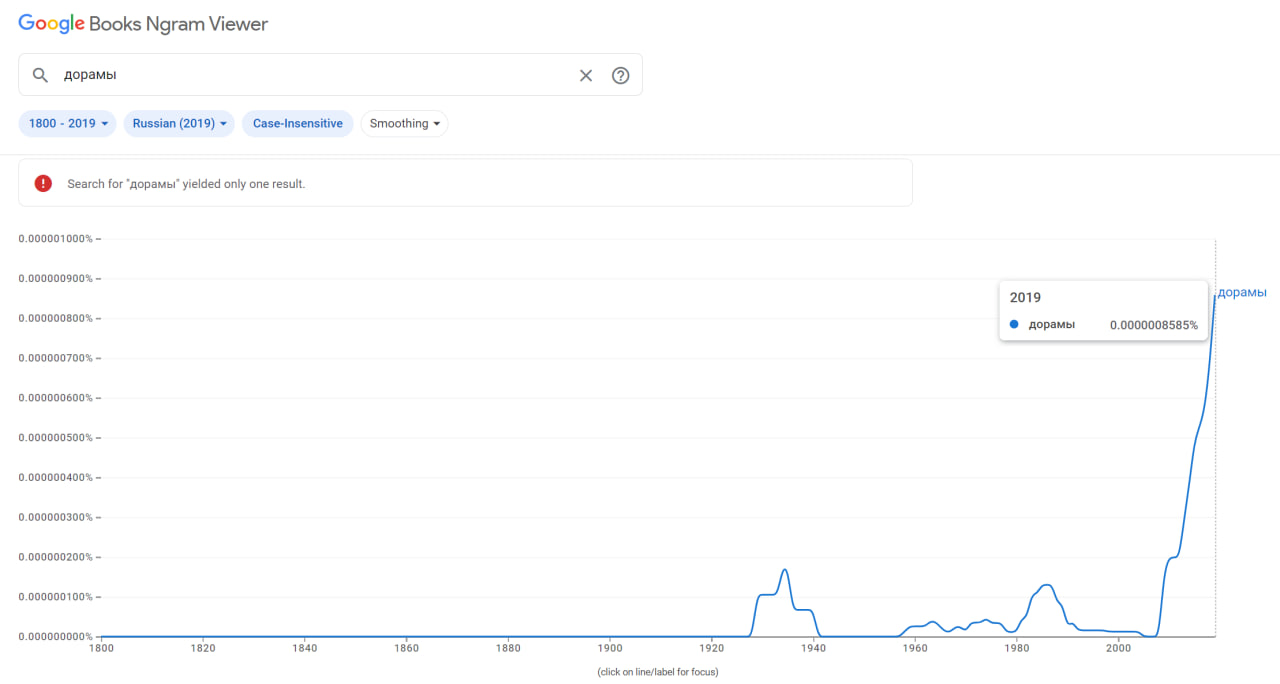

In [159]:
## Задание 3

In [ ]:
# Формула из википедии

In [ ]:
# Количество вхождений биграмм и слов
for text in corpus:
    words = text.split()
    for i in range(len(words) - 1):
        bigram = (words[i], words[i + 1])
        bigram_counter[bigram] += 1
    word_counter.update(words)

# Общее количество слов в корпусе
total_words = sum(word_counter.values())

# PMI для каждой биграммы
pmi_scores = {}
for bigram, freq in bigram_counter.items():
    word1, word2 = bigram
    p_bigram = freq / total_words
    p_word1 = word_counter[word1] / total_words
    p_word2 = word_counter[word2] / total_words
    pmi = math.log(p_bigram / (p_word1 * p_word2))

In [ ]:
# PMI через изначальный scorer 

In [161]:
def scorer_simple(word_count_a, word_count_b, bigram_count, *args):
    try:
        score = bigram_count/((word_count_a+word_count_b))
    
    except ZeroDivisionError:
    
        return 0
    
    return score

def ngrammer(tokens, n=2, stops=set()):
    ngrams = []
    tokens = [token for token in tokens if token not in stops]
    for i in range(0,len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

In [162]:
def collect_stats(corpus, stops):

    unigrams = Counter()
    bigrams = Counter()
    
    for sent in corpus:
        unigrams.update(sent)
        bigrams.update(ngrammer(sent, 2, stops))
    
    return unigrams, bigrams

In [163]:
def score_bigrams(unigrams, bigrams, scorer, threshold=-100000):
 
    bigram2score = Counter()
    
    for bigram in bigrams:
        word_a, word_b = bigram.split()
        score = scorer(unigrams[word_a], unigrams[word_b], 
                       bigrams[bigram])
        
        if score > threshold:
            bigram2score[bigram] = score
    
    return bigram2score
unigrams, bigrams = collect_stats(tokenized_sentences, russian_stopwords)
bigram2score = score_bigrams(unigrams, bigrams, scorer_simple)

In [165]:
bigram2score.most_common(10)

[('сопоцкина друскеник', 0.5),
 ('неприятель приблизившись', 0.5),
 ('саноку обстреливалась', 0.5),
 ('австрийский аэроплан', 0.5),
 ('показывался аэроплан-птица', 0.5),
 ('das ist', 0.5),
 ('ist nesteroff', 0.5),
 ('песнь нестерове', 0.5),
 ('могучий унесся', 0.5),
 ('шумели лязгали', 0.5)]

In [ ]:
# Через обновленный scorer

In [167]:
def scorer(word_count_a, word_count_b, bigram_count, min_count=0):
    try:
        score = ((bigram_count - min_count) / ((word_count_a + word_count_b)))
    except ZeroDivisionError:
        return 0
    
    return score


def score_bigrams(unigrams, bigrams, scorer, threshold=-100000, min_count=0):
    
    bigram2score = Counter()
    
    for bigram in bigrams:
        word_a, word_b = bigram.split()
        score = scorer(unigrams[word_a], unigrams[word_b], bigrams[bigram], min_count)
        
        
        if score > threshold:
            bigram2score[bigram] = score
    
    return bigram2score
bigram2score = score_bigrams(unigrams, bigrams, scorer, min_count=20)

bigram2score.most_common(10)

[('риа новости', 0.4900746163592848),
 ('северном кавказе', 0.44553483807654565),
 ('associated press', 0.4345991561181435),
 ('new york', 0.4218009478672986),
 ('сих пор', 0.39092055485498106),
 ('взрывное устройство', 0.3665768194070081),
 ('таким образом', 0.3657187993680885),
 ('рао еэс', 0.33954451345755693),
 ('доменных имен', 0.31512605042016806),
 ('чрезвычайным ситуациям', 0.30935251798561153)]

In [ ]:
## Задание 4

In [180]:
import math
from math import log

def scorer(word_count_a, word_count_b, bigram_count, min_count=0):
    try:
        score = math.log(bigram_count - min_count) - (math.log(word_count_a) + math.log(word_count_b))
    except ZeroDivisionError: 
        return 0
    
    return score


def score_bigrams(unigrams, bigrams, scorer, threshold=-100000, min_count=0):
    
    bigram2score = Counter()
    
    for bigram in bigrams:
        word_a, word_b = bigram.split()
        score = scorer(unigrams[word_a], unigrams[word_b], bigrams[bigram], min_count)
        
        
        if score > threshold:
            bigram2score[bigram] = score
    
    return bigram2score

bigram2score = score_bigrams(unigrams, bigrams, scorer)

bigram2score.most_common(10)

[('сопоцкина друскеник', 0.0),
 ('неприятель приблизившись', 0.0),
 ('саноку обстреливалась', 0.0),
 ('австрийский аэроплан', 0.0),
 ('показывался аэроплан-птица', 0.0),
 ('das ist', 0.0),
 ('ist nesteroff', 0.0),
 ('песнь нестерове', 0.0),
 ('могучий унесся', 0.0),
 ('шумели лязгали', 0.0)]

In [ ]:
## Задание 5

In [182]:
pip install -U gensim

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/24.0 MB ? eta -:--:--
                                              0.0/24.0 MB ? eta -:--:--
                                             0.0/24.0 MB 653.6 kB/s eta 0:00:37
                                              0.2/24.0 MB 1.4 MB/s eta 0:00:17
                                              0.3/24.0 MB 1.8 MB/s eta 0:00:13
     -                                        0.6/24.0 MB 3.1 MB/s eta 0:00:08
     -                                        0.9/24.0 MB 3.9 MB/s eta 0:00:06
     -                                        0.9/24.0 MB 3.9 MB/s eta 0:00:06
     -                                        0.9/24.0 MB 3.9 MB/s eta 0:00:06
     --                                       1.3/24.0 MB 3.5 MB/s eta 0:00:07
     --                                       1.4/24.0 MB 3.6 MB/s eta 0:00:07
     --                                       1.5/24.0 MB 3.3 MB/s

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
pip install --upgrade gensim

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [1]:
from gensim import models

In [1]:
pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable


In [5]:
def scorer_w2v(worda_count, wordb_count, bigram_count, corpus_word_count, len_vocab=0,  min_count=0):

    try:
        score = ((bigram_count - min_count) * corpus_word_count) / (worda_count * wordb_count)
    except ZeroDivisionError:
        return 0
    
    return score

In [ ]:
# Не удалось решить решить проблему - name 'gensim' is not defined

In [7]:
ph = gensim.models.Phrases(tokenized_sentences, 
                           min_count=1, 
                           threshold=1.,
                           scoring=scorer_w2v)

NameError: name 'gensim' is not defined